# 1. Data Acquisition: Web Scraping

### What is Webscraping?

- web scraping
- web harvesting
- web data extraction 

**Are all terms that decribe the process of extracting data from websites.**   

Web scraping software may access the World Wide Web directly using the Hypertext Transfer Protocol (HTTP), or through a web browser. 

- Can be done manually, for example: https://twitter.com/explore
- Typically automated processes implemented using a bot or web crawler

Web scraping is a form of copying, in which ***specific data*** are gathered and copied from the web.
These data are typically stoerd in a database, a file, or spreadsheet (or a python dataframe), for later retrieval and analysis. 

*Source: Wikipedia.org*

## 1.1 Loading required packages

We will be using a webscraper called ***twitterscraper*** to collect tweets from Twitter.  
https://github.com/taspinar/twitterscraper   

Twitterscraper essentially enters a search querie into the search box on twitter.com and copies the tweets that twitter.com shows in its search results to your computer.

In [1]:
from twitterscraper import query_tweets
import pandas as pd
import numpy as np
import datetime
import time

INFO: {'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; rv:2.2) Gecko/20110201'}


In [2]:
#List of keywords to search for ()
kw_list = ['grubhub']
#kw_list = ['"Corona" AND "Beer"']
begin = datetime.date(2019, 3, 30)
end = datetime.date(2019, 4, 7)
limit = 3000
lang = 'en'
poolsize = 5

if __name__ == '__main__':
    start_time = time.time()
    tweets = query_tweets(query=" OR ".join(kw_list), 
                          begindate=begin, 
                          enddate = end,
                          limit = limit,
                          lang = lang,
                          poolsize = poolsize,
                         )
print(str(len(tweets)) + " tweets scraped in " + str(round(time.time() - start_time, 2)) + " seconds")

tweets_df = pd.DataFrame(columns = ['timestamp', 'username',  'screen_name', 'user_id','tweet_id', 
                                    'text', 'likes', 'replies', 'retweets','tweet_url', 'parent_tweet_id'])
                         #,'has_media', 'hashtags', 'img_urls', 'is_replied','is_reply_to', 'links','reply_to_users', 'video_url']) 
    

for tweet in tweets:
    tweets_df = tweets_df.append({
        'timestamp': tweet.timestamp,
        'username': tweet.username,
        'screen_name': tweet.screen_name,
        'user_id': tweet.user_id,
        'tweet_id': tweet.tweet_id,
        'text': tweet.text,
        'likes': tweet.likes,
        'replies': tweet.replies,
        'retweets' : tweet.retweets,
        'tweet_url': tweet.tweet_url,
        'parent_tweet_id': tweet.parent_tweet_id}, ignore_index=True)
        #,'has_media': tweet.has_media,'hashtags': tweet.hashtags,'img_urls': tweet.img_urls,'is_replied': tweet.is_replied, 'is_reply_to': tweet.is_reply_to, 'links': tweet.links,'reply_to_users': tweet.reply_to_users, 'video_url': tweet.video_url}, ignore_index=True)

# Delete the tweet object from memory
import gc
del tweets
gc.collect()  

INFO: queries: ['grubhub since:2019-03-30 until:2019-03-31', 'grubhub since:2019-03-31 until:2019-04-02', 'grubhub since:2019-04-02 until:2019-04-03', 'grubhub since:2019-04-03 until:2019-04-05', 'grubhub since:2019-04-05 until:2019-04-07']
INFO: Got 402 tweets (402 new).
INFO: Got 854 tweets (452 new).
INFO: Got 1458 tweets (604 new).
INFO: Got 2069 tweets (611 new).
INFO: Got 2680 tweets (611 new).


2680 tweets scraped in 26.66 seconds


0

## 1.6 Let's scrape more tweets - but for a different time window!

To compare the 2019 "Corona" related tweets to the 2020 "Corona" related tweet, we need to also scrape tweets for "Corono" in 2020.

In [3]:
from twitterscraper import query_tweets
#List of keywords to search for ()
kw_list = ['grubhub']
begin = datetime.date(2020, 3, 30)
end = datetime.date(2020, 4, 7)
limit = 3000
lang = 'en'
poolsize = 5

# Start the Scraper
if __name__ == '__main__':
    start_time = time.time()
    tweets = query_tweets(query=" OR ".join(kw_list), 
                          begindate=begin, 
                          enddate = end,
                          limit = limit,
                          lang = lang,
                          poolsize = poolsize,
                         )
display(str(len(tweets)) + " tweets scraped in " + str(round(time.time() - start_time, 2)) + " seconds")

# Define a dataframe
tweets_df2 = pd.DataFrame(columns = ['timestamp', 'username',  'screen_name', 'user_id','tweet_id', 
                                    'text', 'likes', 'replies', 'retweets','tweet_url', 'parent_tweet_id'])
                         #,'has_media', 'hashtags', 'img_urls', 'is_replied','is_reply_to', 'links','reply_to_users', 'video_url']) 
    
# populate the dataframe    
for tweet in tweets:
    tweets_df2 = tweets_df2.append({
        'timestamp': tweet.timestamp,
        'username': tweet.username,
        'screen_name': tweet.screen_name,
        'user_id': tweet.user_id,
        'tweet_id': tweet.tweet_id,
        'text': tweet.text,
        'likes': tweet.likes,
        'replies': tweet.replies,
        'retweets' : tweet.retweets,
        'tweet_url': tweet.tweet_url,
        'parent_tweet_id': tweet.parent_tweet_id}, ignore_index=True)
        #,'has_media': tweet.has_media,'hashtags': tweet.hashtags,'img_urls': tweet.img_urls,'is_replied': tweet.is_replied, 'is_reply_to': tweet.is_reply_to, 'links': tweet.links,'reply_to_users': tweet.reply_to_users, 'video_url': tweet.video_url}, ignore_index=True)

# Delete the tweet object from memory
import gc
del tweets
gc.collect()  

INFO: queries: ['grubhub since:2020-03-30 until:2020-03-31', 'grubhub since:2020-03-31 until:2020-04-02', 'grubhub since:2020-04-02 until:2020-04-03', 'grubhub since:2020-04-03 until:2020-04-05', 'grubhub since:2020-04-05 until:2020-04-07']
INFO: Got 602 tweets (602 new).
INFO: Got 1209 tweets (607 new).
INFO: Got 1819 tweets (610 new).
INFO: Got 2423 tweets (604 new).
INFO: Got 3039 tweets (616 new).


'3039 tweets scraped in 25.85 seconds'

0

### For simplicity, we append the scraped tweets from both time periods in a single dataframe

In [4]:
# Now append the second dataframe to the first one
tweets_df=tweets_df.append(tweets_df2, ignore_index = True)
# Reset index
#tweets_df.reset_index(inplace = True) 
# Check if it worked!
tweets_df.shape

(5719, 11)

In [5]:
tweets_df.to_csv("GrubhubTwitterScraper.csv", index = False)

In [6]:
# Delete the second dataframe from memory
import gc
del tweets_df2
gc.collect()
tweets_df2 = pd.DataFrame() # this creates an empty dataframe to make sure that the original one was deleted

# 2. Sentiment Analysis

- Sentiment Analysis, or **Opinion Mining**, is a sub-field of Natural Language Processing (NLP)
- Tries to identify and extract opinions within a given text. 

### Definition of Sentiment
1. A view of or attitude toward a situation or event; an opinion.  
"I agree with your sentiments regarding the road bridge"  


2. Exaggerated and self-indulgent feelings of tenderness, sadness, or nostalgia.  
"many of the appeals rely on treacly sentiment"

*Source: Oxford Dictionary*

**In this course, we will measure the polarity of text.**

**Polarity** in sentiment analysis refers to identifying sentiment orientation:
- positive
- neutral
- negative   

in written or spoken language


### Objetive of Sentiment Analysis
Gauge the attitude, sentiments, evaluations, attitudes and emotions of a speaker/writer based on the computational treatment of subjectivity in a text.




## 2.1 Sentiment Scoring - Polarity



In [2]:
# Import the module you need
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Instantiate the sentiment analyzer
analyser = SentimentIntensityAnalyzer()

In [3]:
# Define a function that returns the polarity score of a sentence
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<55} {}".format(sentence, str(score)), "\n")

## 2.2 Sentiment Analysis on Twitter Data

Before we can start analyzing the sentiment of the scraped tweets, we need to do some data cleaning and preprocessing
- remove URLs from tweets
- remove # and @ from tweets
- remove reserved words (e.g., RT and FAV) from tweets
- remove links to images

### 2.2.1 Remove undesirable strings from tweets

**Note:** for a nice package to do the following (and more!) check out: https://pypi.org/project/tweet-preprocessor/

In [9]:
# import regular expressions
import re

# Set-up patterns to be removed fro the tweets
pat1 = r"http\S+"
pat2 = r"#"
pat3 = r"@"
pat4 = r"FAV"
pat5 = r"RE"
pat6 = r"pic.\S+"
combined_pat = r'|'.join((pat1, pat2, pat3, pat4, pat5, pat6))

# replace the patterns with an empty string
tweets_df['stripped'] =  [re.sub(combined_pat, '', w) for w in tweets_df.text]

# might have double spaces now (because of empty string replacements above) - remove double empty spaces
tweets_df['stripped']  = [re.sub(r"  ", ' ', w) for w in tweets_df.loc[:,'stripped']]

# Print tweets
for i in range(0,12):
    print(tweets_df.stripped[i])
    print('\n')

That TOTALLY sucks! They broke Maz's arm right off!


So... every once in a while I cheat and get Taco Bell. (save the boos and hisses, it get’s worse.) So they’ve been advertising free delivery via Grubhub. So not only I’m I eating poorly... I’m
too lazy to go...  …


Due to personal reasons, I will be eating lots of cheese tonight.


Y would a tv star go out 2am 4 a subway sandwich in Chicago during a snowstorm? 

U have assistants 4 that. 

Ur hotel has concierge 4 that. 

GrubHub is 4 that.

The lies get deeper....

 jussiesmollett KimFoxxforSA TinaTchen MichelleObama RahmEmmanuel Chicago_Police …


when the grubhub driver up your food and then just sits there stationary for ten minutes


Delivery services I trust to come through in the end

1. UPS 
2. Grubhub
3. The officials for the Patriots
4. Whoever sends jerseys from China
5. Atlanta teams in the 4th Qtr
6. The Pony Express
. 
.
98. Spirit Airlines 
99. Marvin Lewis in the playoffs 
100. FedEx


Uber eats & grub hub are clutc

### 2.2.2 Let's get the compound sentiment scores for all tweets

In [10]:
# Import the sentiment module (if you haven't already done so)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Import numpy (if you have not already done so)
import numpy as np

# Instantiate the sentiment analyzer (if you haven't already done so)
analyser = SentimentIntensityAnalyzer()

# Now get the compound sentiment score for each tweet
tweets_df['C_Score'] = np.nan
for index, row in tweets_df.iterrows(): 
    tweets_df.loc[index, 'C_Score'] = analyser.polarity_scores(row['stripped'])['compound']
# Let's take a look!
pd.set_option('display.max_colwidth', -1)
tweets_df[['stripped','C_Score']].head(-50)

C:\Users\Cecilia_Z\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  from ipykernel import kernelapp as app


,stripped,C_Score
0,That TOTALLY sucks! They broke Maz's arm right off!,-0.8331
1,"So... every once in a while I cheat and get Taco Bell. (save the boos and hisses, it get’s worse.) So they’ve been advertising free delivery via Grubhub. So not only I’m I eating poorly... I’m\ntoo lazy to go... …",-0.2732
2,"Due to personal reasons, I will be eating lots of cheese tonight.",0.0000
3,Y would a tv star go out 2am 4 a subway sandwich in Chicago during a snowstorm? \n\nU have assistants 4 that. \n\nUr hotel has concierge 4 that. \n\nGrubHub is 4 that.\n\nThe lies get deeper....\n\n jussiesmollett KimFoxxforSA TinaTchen MichelleObama RahmEmmanuel Chicago_Police …,-0.4215
4,when the grubhub driver up your food and then just sits there stationary for ten minutes,0.0000
...,...,...
5664,Thank you for all your advocacy.,0.3612
5665,Amen! GigWorkersRise,0.0000
5666,"I'm seeing shipping is up, pick up is open, and delivery is via grubhub?",0.0000
5667,Sugarfire BBQ Can Be Delivered To Your Home or Office Door Using GRUBHUB!\nORDER NOW... …,0.0000


### 2.2.3 Some basic sentiment descriptives
Let's get a first impression of the Sentiment across the tweets we scraped

In [11]:
# import necessary modules (if not already imported)
import pandas as pd
import numpy as np

print(f"Count positive tweets: {sum(tweets_df['C_Score'] > 0.05)}")
print(f"Count netural tweets: {tweets_df['C_Score'].between(-0.05, 0.05).sum()}")
print(f"Count negative tweets: {sum(tweets_df['C_Score'] < -0.05)}")
print(f"Total number of tweets: {tweets_df['C_Score'].count()}")
      
display(tweets_df.C_Score.describe())

Count positive tweets: 2729
Count netural tweets: 1624
Count negative tweets: 1366
Total number of tweets: 5719


count    5719.000000
mean     0.156914   
std      0.462240   
min     -0.952800   
25%      0.000000   
50%      0.000000   
75%      0.555000   
max      0.984300   
Name: C_Score, dtype: float64

### 2.3.4 Twitter sentiment EDA

Let's explore consumer sentiment some more using data visualization.   

### Get a visual impression of the sentiment distribution

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Sentiment Distribution')]

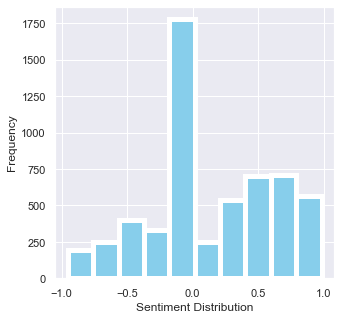

In [12]:
# import necessary modules (if not already imported)
import matplotlib.pyplot as plt
import seaborn as sns

# settings for seaborn plotting style
sns.set(color_codes=True)

# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

# Create Histogram
ax = sns.distplot(tweets_df['C_Score'],
                  bins=10,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 5,'alpha':1})
ax.set(xlabel='Sentiment Distribution', ylabel='Frequency')

#### Let's ***simplify our analysis*** by creating a new variable called *"Sentiment"* that assumes the strings:
- **Postive** if the compound sentiment score (C_Score) is greater than 0.05
- **Negative** if the compound sentiment score (C_Score) is less than - 0.05
- **Neutral** if the compound sentiment score (C_Score) is between -0.05 and 0.05 (including both values)

In [13]:
# create new column
tweets_df['Sentiment'] = np.nan

# Loop through rows of dataframe and determine strings for new column "Sentiment"
for index, row in tweets_df.iterrows(): 
    if tweets_df.loc[index, 'C_Score'] > 0.05 : 
            tweets_df.loc[index, 'Sentiment'] = "Positive"       
    elif tweets_df.loc[index, 'C_Score'] < -0.05 :
            tweets_df.loc[index, 'Sentiment'] = "Negative"   
    else : 
        tweets_df.loc[index, 'Sentiment'] = "Neutral"

In [14]:
# See whether it worked 
tweets_df[['stripped','C_Score', 'Sentiment']].head(25)


,stripped,C_Score,Sentiment
0,That TOTALLY sucks! They broke Maz's arm right off!,-0.8331,Negative
1,"So... every once in a while I cheat and get Taco Bell. (save the boos and hisses, it get’s worse.) So they’ve been advertising free delivery via Grubhub. So not only I’m I eating poorly... I’m\ntoo lazy to go... …",-0.2732,Negative
2,"Due to personal reasons, I will be eating lots of cheese tonight.",0.0000,Neutral
3,Y would a tv star go out 2am 4 a subway sandwich in Chicago during a snowstorm? \n\nU have assistants 4 that. \n\nUr hotel has concierge 4 that. \n\nGrubHub is 4 that.\n\nThe lies get deeper....\n\n jussiesmollett KimFoxxforSA TinaTchen MichelleObama RahmEmmanuel Chicago_Police …,-0.4215,Negative
4,when the grubhub driver up your food and then just sits there stationary for ten minutes,0.0000,Neutral
5,Delivery services I trust to come through in the end\n\n1. UPS \n2. Grubhub\n3. The officials for the Patriots\n4. Whoever sends jerseys from China\n5. Atlanta teams in the 4th Qtr\n6. The Pony Express\n. \n.\n98. Spirit Airlines \n99. Marvin Lewis in the playoffs \n100. FedEx,0.6124,Positive
6,Uber eats & grub hub are clutch af,0.0000,Neutral
7,"I just asked ""you mean there's no charge over a 10 dollar order""? I'm trying to figure out whether or not to dive into GrubHub. …",-0.2960,Negative
8,Use link for $10 off : \nUse code: Storetodoor or if you wanna pick it up \n$15 worth of food for almost free \ndoordash doordashpromo postmates grubhub ubereats free marchmadness⁠ ⁠⁠ ⁠⁠ ⁠⁠ ⁠cheapfood lunch dinner,0.8024,Positive
9,doordash or grub hub,0.0000,Neutral


### Visualize the Sentiment Category Shares in a Donut Chart

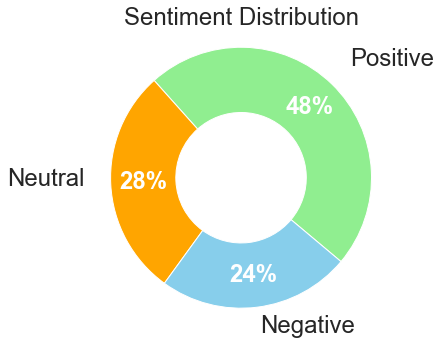

In [15]:
# import necessary modules (if not already imported)
import matplotlib.pyplot as plt

# Set font size
plt.rcParams['font.size']=24

# Define figure
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))

# Get count by sentiment category from tweets_df
sentiment_counts = tweets_df.Sentiment.value_counts()
labels = sentiment_counts.index

# Define colors
color_palette_list = ['lightgreen', 'orange', 'skyblue']

# Generate graph components
wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
       colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

# Plot wedges
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                horizontalalignment=horizontalalignment)
# Set title
ax.set_title("Sentiment Distribution", y=.95, fontsize = 24)

# Show Donut Chart
plt.show()

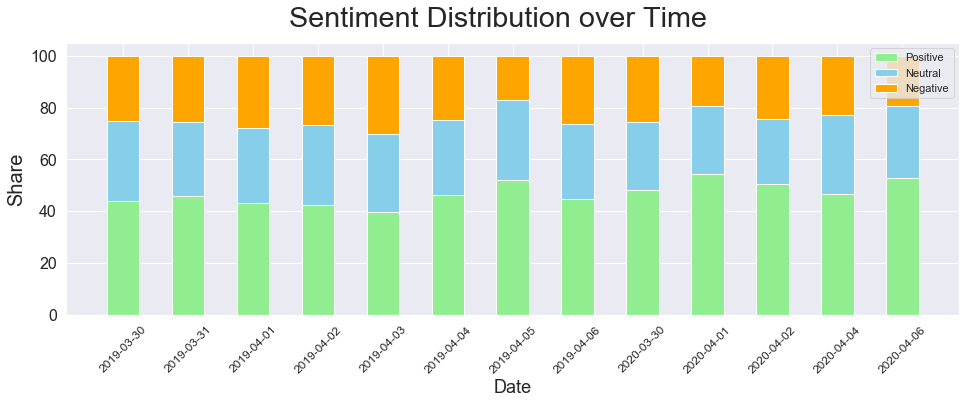

In [16]:
import math
tweets_df['date'] = [one.date() for one in tweets_df['timestamp']]
tweets_df = tweets_df.sort_values(by=['date'])

sentiments = ["Positive", "Neutral", "Negative"]
positiveProps = (tweets_df[tweets_df.Sentiment == 'Positive'].groupby(['date']).count()[['Sentiment']]/ tweets_df.groupby(['date']).count()[['Sentiment']])*100
neutralProps = (tweets_df[tweets_df.Sentiment == 'Neutral'].groupby(['date']).count()[['Sentiment']]/ tweets_df.groupby(['date']).count()[['Sentiment']])*100
negativeProps = (tweets_df[tweets_df.Sentiment == 'Negative'].groupby(['date']).count()[['Sentiment']]/ tweets_df.groupby(['date']).count()[['Sentiment']])*100
 
positiveProps = positiveProps['Sentiment'].tolist()
neutralProps = neutralProps['Sentiment'].tolist()
negativeProps = negativeProps['Sentiment'].tolist()
plt.figure(figsize=[16, 5])
barWidth = 0.5
labels = tweets_df.date.unique()
r = np.arange(len(labels))
positiveProps = [0 if math.isnan(x) else x for x in positiveProps]
neutralProps = [0 if math.isnan(x) else x for x in neutralProps]
negativeProps = [0 if math.isnan(x) else x for x in negativeProps]

plt.bar(r,positiveProps, color='lightgreen', edgecolor='white', width=barWidth)
plt.bar(r, neutralProps, bottom=positiveProps, color='skyblue', edgecolor='white', width=barWidth)
plt.bar(r, negativeProps, bottom=[i+j for i,j in zip(positiveProps, neutralProps)], color='orange', edgecolor='white', width=barWidth)
 
plt.xticks(r, labels, rotation = 45, fontsize=12)
plt.yticks(fontsize=16)
plt.suptitle('Sentiment Distribution over Time')
plt.xlabel("Date", fontsize=18)
plt.ylabel("Share", fontsize=20)
plt.legend(sentiments)
plt.show()

In [17]:
#List of keywords to search for ()
kw_list = ['doordash']
begin = datetime.date(2019, 3, 30)
end = datetime.date(2019, 4, 7)
limit = 3000
lang = 'en'
poolsize = 5

if __name__ == '__main__':
    start_time = time.time()
    tweets = query_tweets(query=" OR ".join(kw_list), 
                          begindate=begin, 
                          enddate = end,
                          limit = limit,
                          lang = lang,
                          poolsize = poolsize,
                         )
print(str(len(tweets)) + " tweets scraped in " + str(round(time.time() - start_time, 2)) + " seconds")

tweets_df = pd.DataFrame(columns = ['timestamp', 'username',  'screen_name', 'user_id','tweet_id', 
                                    'text', 'likes', 'replies', 'retweets','tweet_url', 'parent_tweet_id'])
                         #,'has_media', 'hashtags', 'img_urls', 'is_replied','is_reply_to', 'links','reply_to_users', 'video_url']) 
    

for tweet in tweets:
    tweets_df = tweets_df.append({
        'timestamp': tweet.timestamp,
        'username': tweet.username,
        'screen_name': tweet.screen_name,
        'user_id': tweet.user_id,
        'tweet_id': tweet.tweet_id,
        'text': tweet.text,
        'likes': tweet.likes,
        'replies': tweet.replies,
        'retweets' : tweet.retweets,
        'tweet_url': tweet.tweet_url,
        'parent_tweet_id': tweet.parent_tweet_id}, ignore_index=True)
        #,'has_media': tweet.has_media,'hashtags': tweet.hashtags,'img_urls': tweet.img_urls,'is_replied': tweet.is_replied, 'is_reply_to': tweet.is_reply_to, 'links': tweet.links,'reply_to_users': tweet.reply_to_users, 'video_url': tweet.video_url}, ignore_index=True)

# Delete the tweet object from memory
import gc
del tweets
gc.collect()  

INFO: queries: ['doordash since:2019-03-30 until:2019-03-31', 'doordash since:2019-03-31 until:2019-04-02', 'doordash since:2019-04-02 until:2019-04-03', 'doordash since:2019-04-03 until:2019-04-05', 'doordash since:2019-04-05 until:2019-04-07']
INFO: Got 606 tweets (606 new).
INFO: Got 1216 tweets (610 new).
INFO: Got 1819 tweets (603 new).
INFO: Got 2426 tweets (607 new).
INFO: Got 3032 tweets (606 new).


3032 tweets scraped in 25.86 seconds


0

In [18]:
from twitterscraper import query_tweets
#List of keywords to search for ()
kw_list = ['doordash']
begin = datetime.date(2020, 3, 30)
end = datetime.date(2020, 4, 7)
limit = 3000
lang = 'en'
poolsize = 5

# Start the Scraper
if __name__ == '__main__':
    start_time = time.time()
    tweets = query_tweets(query=" OR ".join(kw_list), 
                          begindate=begin, 
                          enddate = end,
                          limit = limit,
                          lang = lang,
                          poolsize = poolsize,
                         )
display(str(len(tweets)) + " tweets scraped in " + str(round(time.time() - start_time, 2)) + " seconds")

# Define a dataframe
tweets_df2 = pd.DataFrame(columns = ['timestamp', 'username',  'screen_name', 'user_id','tweet_id', 
                                    'text', 'likes', 'replies', 'retweets','tweet_url', 'parent_tweet_id'])
                         #,'has_media', 'hashtags', 'img_urls', 'is_replied','is_reply_to', 'links','reply_to_users', 'video_url']) 
    
# populate the dataframe    
for tweet in tweets:
    tweets_df2 = tweets_df2.append({
        'timestamp': tweet.timestamp,
        'username': tweet.username,
        'screen_name': tweet.screen_name,
        'user_id': tweet.user_id,
        'tweet_id': tweet.tweet_id,
        'text': tweet.text,
        'likes': tweet.likes,
        'replies': tweet.replies,
        'retweets' : tweet.retweets,
        'tweet_url': tweet.tweet_url,
        'parent_tweet_id': tweet.parent_tweet_id}, ignore_index=True)
        #,'has_media': tweet.has_media,'hashtags': tweet.hashtags,'img_urls': tweet.img_urls,'is_replied': tweet.is_replied, 'is_reply_to': tweet.is_reply_to, 'links': tweet.links,'reply_to_users': tweet.reply_to_users, 'video_url': tweet.video_url}, ignore_index=True)

# Delete the tweet object from memory
import gc
del tweets
gc.collect()  

INFO: queries: ['doordash since:2020-03-30 until:2020-03-31', 'doordash since:2020-03-31 until:2020-04-02', 'doordash since:2020-04-02 until:2020-04-03', 'doordash since:2020-04-03 until:2020-04-05', 'doordash since:2020-04-05 until:2020-04-07']
INFO: Got 608 tweets (608 new).
INFO: Got 1224 tweets (616 new).
INFO: Got 1829 tweets (605 new).
INFO: Got 2436 tweets (607 new).
INFO: Got 3041 tweets (605 new).


'3041 tweets scraped in 22.66 seconds'

0

In [19]:
# Now append the second dataframe to the first one
tweets_df=tweets_df.append(tweets_df2, ignore_index = True)
# Reset index
#tweets_df.reset_index(inplace = True) 
# Check if it worked!
tweets_df.shape

(6073, 11)

In [20]:
tweets_df.to_csv("DoordashTwitterScraper.csv", index = False)

In [21]:
# Delete the second dataframe from memory
import gc
del tweets_df2
gc.collect()
tweets_df2 = pd.DataFrame() # this creates an empty dataframe to make sure that the original one was deleted

In [22]:
# import regular expressions
import re

# Set-up patterns to be removed fro the tweets
pat1 = r"http\S+"
pat2 = r"#"
pat3 = r"@"
pat4 = r"FAV"
pat5 = r"RE"
pat6 = r"pic.\S+"
combined_pat = r'|'.join((pat1, pat2, pat3, pat4, pat5, pat6))

# replace the patterns with an empty string
tweets_df['stripped'] =  [re.sub(combined_pat, '', w) for w in tweets_df.text]

# might have double spaces now (because of empty string replacements above) - remove double empty spaces
tweets_df['stripped']  = [re.sub(r"  ", ' ', w) for w in tweets_df.loc[:,'stripped']]

# Print tweets
for i in range(0,12):
    print(tweets_df.stripped[i])
    print('\n')

So im trying doordash out tonight and I am SO EXCITED to get sushi delivered to me rightnow


So I’m trying my best to save Guap/ limit spending on food cause I really odeee odee... but Door Dash just added Chik Fila smfhhhhhhhhhhhhhhhhhhhhh


DoorDash_Help so our order got up 30 minutes ago and driver let us know it will be another 21 minutes. We live less than 3 miles from restaurant.


Hi aurenmuro314, we're sorry about this experience. Please send us a direct message at DoorDash_Help with your email address and we will look into this right away.


Rating him 1 star on doordash for food you bought him that he delivered to his damn self: closure


Doordash is the best invention for tired and lazy biches like me


So I did door dash for the first time today and I hated every minute of it... now I keep thinking that my throat is closing because he poisoned my food I hate that I’m like this!!


DoorDash could y’all please investigate this and fix the problem they should not be able to u

In [23]:
# Import the sentiment module (if you haven't already done so)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Import numpy (if you have not already done so)
import numpy as np

# Instantiate the sentiment analyzer (if you haven't already done so)
analyser = SentimentIntensityAnalyzer()

# Now get the compound sentiment score for each tweet
tweets_df['C_Score'] = np.nan
for index, row in tweets_df.iterrows(): 
    tweets_df.loc[index, 'C_Score'] = analyser.polarity_scores(row['stripped'])['compound']
# Let's take a look!
pd.set_option('display.max_colwidth', -1)
tweets_df[['stripped','C_Score']].head(-50)

C:\Users\Cecilia_Z\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  from ipykernel import kernelapp as app


,stripped,C_Score
0,So im trying doordash out tonight and I am SO EXCITED to get sushi delivered to me rightnow,0.7139
1,So I’m trying my best to save Guap/ limit spending on food cause I really odeee odee... but Door Dash just added Chik Fila smfhhhhhhhhhhhhhhhhhhhhh,0.5719
2,DoorDash_Help so our order got up 30 minutes ago and driver let us know it will be another 21 minutes. We live less than 3 miles from restaurant.,0.0000
3,"Hi aurenmuro314, we're sorry about this experience. Please send us a direct message at DoorDash_Help with your email address and we will look into this right away.",0.2500
4,Rating him 1 star on doordash for food you bought him that he delivered to his damn self: closure,-0.4019
...,...,...
6018,doordash it to my house,0.0000
6019,gofooji\n $20 DoorDash Gift Card. AloneTogether sweepstakes NO PURCHASE,-0.0085
6020,"My Burro fam \nHappy thurrrrrrsday !\n\nStay home, stay safe & order online! freedelivery doorstepdelivery doordash free Postmates",0.8881
6021,"Stay home, stay safe & order online! freedelivery doorstepdelivery doordash free Postmates",0.7574


In [24]:
# import necessary modules (if not already imported)
import pandas as pd
import numpy as np

print(f"Count positive tweets: {sum(tweets_df['C_Score'] > 0.05)}")
print(f"Count netural tweets: {tweets_df['C_Score'].between(-0.05, 0.05).sum()}")
print(f"Count negative tweets: {sum(tweets_df['C_Score'] < -0.05)}")
print(f"Total number of tweets: {tweets_df['C_Score'].count()}")
      
display(tweets_df.C_Score.describe())

Count positive tweets: 2872
Count netural tweets: 1690
Count negative tweets: 1511
Total number of tweets: 6073


count    6073.000000
mean     0.119683   
std      0.444483   
min     -0.980100   
25%     -0.025800   
50%      0.000000   
75%      0.457400   
max      0.979400   
Name: C_Score, dtype: float64

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Sentiment Distribution')]

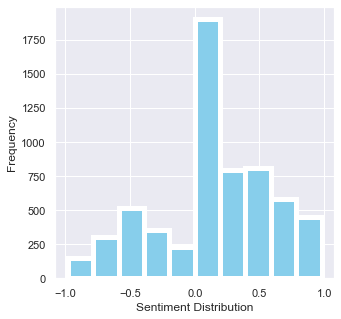

In [25]:
# import necessary modules (if not already imported)
import matplotlib.pyplot as plt
import seaborn as sns

# settings for seaborn plotting style
sns.set(color_codes=True)

# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

# Create Histogram
ax = sns.distplot(tweets_df['C_Score'],
                  bins=10,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 5,'alpha':1})
ax.set(xlabel='Sentiment Distribution', ylabel='Frequency')

In [26]:
# create new column
tweets_df['Sentiment'] = np.nan

# Loop through rows of dataframe and determine strings for new column "Sentiment"
for index, row in tweets_df.iterrows(): 
    if tweets_df.loc[index, 'C_Score'] > 0.05 : 
            tweets_df.loc[index, 'Sentiment'] = "Positive"       
    elif tweets_df.loc[index, 'C_Score'] < -0.05 :
            tweets_df.loc[index, 'Sentiment'] = "Negative"   
    else : 
        tweets_df.loc[index, 'Sentiment'] = "Neutral"

In [27]:
# See whether it worked 
tweets_df[['stripped','C_Score', 'Sentiment']].head(25)


,stripped,C_Score,Sentiment
0,So im trying doordash out tonight and I am SO EXCITED to get sushi delivered to me rightnow,0.7139,Positive
1,So I’m trying my best to save Guap/ limit spending on food cause I really odeee odee... but Door Dash just added Chik Fila smfhhhhhhhhhhhhhhhhhhhhh,0.5719,Positive
2,DoorDash_Help so our order got up 30 minutes ago and driver let us know it will be another 21 minutes. We live less than 3 miles from restaurant.,0.0000,Neutral
3,"Hi aurenmuro314, we're sorry about this experience. Please send us a direct message at DoorDash_Help with your email address and we will look into this right away.",0.2500,Positive
4,Rating him 1 star on doordash for food you bought him that he delivered to his damn self: closure,-0.4019,Negative
5,Doordash is the best invention for tired and lazy biches like me,0.3182,Positive
6,So I did door dash for the first time today and I hated every minute of it... now I keep thinking that my throat is closing because he poisoned my food I hate that I’m like this!!,-0.8802,Negative
7,DoorDash could y’all please investigate this and fix the problem they should not be able to use your app anymore,-0.1027,Negative
8,"Well I might keep it and just do UberEats or DoorDash at the same time? Idk. Our town doesn’t have it, so instead of sitting at home and getting orders I am sitting in my car waiting.",0.1779,Positive
9,Door dash trash af I should punch the fuckin driver,0.0000,Neutral


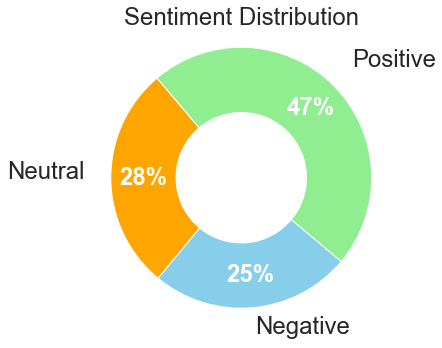

In [28]:
# import necessary modules (if not already imported)
import matplotlib.pyplot as plt

# Set font size
plt.rcParams['font.size']=24

# Define figure
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))

# Get count by sentiment category from tweets_df
sentiment_counts = tweets_df.Sentiment.value_counts()
labels = sentiment_counts.index

# Define colors
color_palette_list = ['lightgreen', 'orange', 'skyblue']

# Generate graph components
wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
       colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

# Plot wedges
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                horizontalalignment=horizontalalignment)
# Set title
ax.set_title("Sentiment Distribution", y=.95, fontsize = 24)

# Show Donut Chart
plt.show()

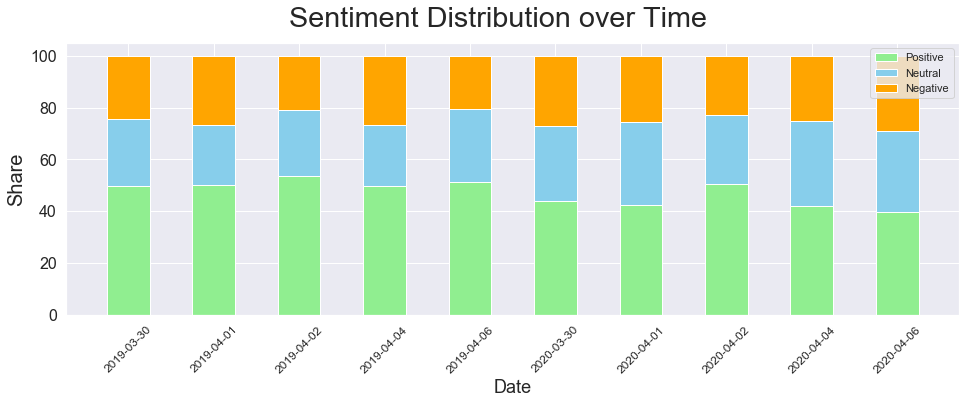

In [29]:
import math
tweets_df['date'] = [one.date() for one in tweets_df['timestamp']]
tweets_df = tweets_df.sort_values(by=['date'])

sentiments = ["Positive", "Neutral", "Negative"]
positiveProps = (tweets_df[tweets_df.Sentiment == 'Positive'].groupby(['date']).count()[['Sentiment']]/ tweets_df.groupby(['date']).count()[['Sentiment']])*100
neutralProps = (tweets_df[tweets_df.Sentiment == 'Neutral'].groupby(['date']).count()[['Sentiment']]/ tweets_df.groupby(['date']).count()[['Sentiment']])*100
negativeProps = (tweets_df[tweets_df.Sentiment == 'Negative'].groupby(['date']).count()[['Sentiment']]/ tweets_df.groupby(['date']).count()[['Sentiment']])*100
 
positiveProps = positiveProps['Sentiment'].tolist()
neutralProps = neutralProps['Sentiment'].tolist()
negativeProps = negativeProps['Sentiment'].tolist()
plt.figure(figsize=[16, 5])
barWidth = 0.5
labels = tweets_df.date.unique()
r = np.arange(len(labels))
positiveProps = [0 if math.isnan(x) else x for x in positiveProps]
neutralProps = [0 if math.isnan(x) else x for x in neutralProps]
negativeProps = [0 if math.isnan(x) else x for x in negativeProps]

plt.bar(r,positiveProps, color='lightgreen', edgecolor='white', width=barWidth)
plt.bar(r, neutralProps, bottom=positiveProps, color='skyblue', edgecolor='white', width=barWidth)
plt.bar(r, negativeProps, bottom=[i+j for i,j in zip(positiveProps, neutralProps)], color='orange', edgecolor='white', width=barWidth)
 
plt.xticks(r, labels, rotation = 45, fontsize=12)
plt.yticks(fontsize=16)
plt.suptitle('Sentiment Distribution over Time')
plt.xlabel("Date", fontsize=18)
plt.ylabel("Share", fontsize=20)
plt.legend(sentiments)
plt.show()

In [7]:
#List of keywords to search for ()
kw_list = ['ubereats']
begin = datetime.date(2019, 3, 30)
end = datetime.date(2019, 4, 7)
limit = 3000
lang = 'en'
poolsize = 5

if __name__ == '__main__':
    start_time = time.time()
    tweets = query_tweets(query=" OR ".join(kw_list), 
                          begindate=begin, 
                          enddate = end,
                          limit = limit,
                          lang = lang,
                          poolsize = poolsize,
                         )
print(str(len(tweets)) + " tweets scraped in " + str(round(time.time() - start_time, 2)) + " seconds")

tweets_df = pd.DataFrame(columns = ['timestamp', 'username',  'screen_name', 'user_id','tweet_id', 
                                    'text', 'likes', 'replies', 'retweets','tweet_url', 'parent_tweet_id'])
                         #,'has_media', 'hashtags', 'img_urls', 'is_replied','is_reply_to', 'links','reply_to_users', 'video_url']) 
    

for tweet in tweets:
    tweets_df = tweets_df.append({
        'timestamp': tweet.timestamp,
        'username': tweet.username,
        'screen_name': tweet.screen_name,
        'user_id': tweet.user_id,
        'tweet_id': tweet.tweet_id,
        'text': tweet.text,
        'likes': tweet.likes,
        'replies': tweet.replies,
        'retweets' : tweet.retweets,
        'tweet_url': tweet.tweet_url,
        'parent_tweet_id': tweet.parent_tweet_id}, ignore_index=True)
        #,'has_media': tweet.has_media,'hashtags': tweet.hashtags,'img_urls': tweet.img_urls,'is_replied': tweet.is_replied, 'is_reply_to': tweet.is_reply_to, 'links': tweet.links,'reply_to_users': tweet.reply_to_users, 'video_url': tweet.video_url}, ignore_index=True)

# Delete the tweet object from memory
import gc
del tweets
gc.collect()  

INFO: queries: ['ubereats since:2019-03-30 until:2019-03-31', 'ubereats since:2019-03-31 until:2019-04-02', 'ubereats since:2019-04-02 until:2019-04-03', 'ubereats since:2019-04-03 until:2019-04-05', 'ubereats since:2019-04-05 until:2019-04-07']
INFO: Got 602 tweets (602 new).
INFO: Got 1204 tweets (602 new).
INFO: Got 1823 tweets (619 new).
INFO: Got 2433 tweets (610 new).
INFO: Got 3041 tweets (608 new).


3041 tweets scraped in 21.85 seconds


0

In [8]:
from twitterscraper import query_tweets
#List of keywords to search for ()
kw_list = ['ubereats']
begin = datetime.date(2020, 3, 30)
end = datetime.date(2020, 4, 7)
limit = 3000
lang = 'en'
poolsize = 5

# Start the Scraper
if __name__ == '__main__':
    start_time = time.time()
    tweets = query_tweets(query=" OR ".join(kw_list), 
                          begindate=begin, 
                          enddate = end,
                          limit = limit,
                          lang = lang,
                          poolsize = poolsize,
                         )
display(str(len(tweets)) + " tweets scraped in " + str(round(time.time() - start_time, 2)) + " seconds")

# Define a dataframe
tweets_df2 = pd.DataFrame(columns = ['timestamp', 'username',  'screen_name', 'user_id','tweet_id', 
                                    'text', 'likes', 'replies', 'retweets','tweet_url', 'parent_tweet_id'])
                         #,'has_media', 'hashtags', 'img_urls', 'is_replied','is_reply_to', 'links','reply_to_users', 'video_url']) 
    
# populate the dataframe    
for tweet in tweets:
    tweets_df2 = tweets_df2.append({
        'timestamp': tweet.timestamp,
        'username': tweet.username,
        'screen_name': tweet.screen_name,
        'user_id': tweet.user_id,
        'tweet_id': tweet.tweet_id,
        'text': tweet.text,
        'likes': tweet.likes,
        'replies': tweet.replies,
        'retweets' : tweet.retweets,
        'tweet_url': tweet.tweet_url,
        'parent_tweet_id': tweet.parent_tweet_id}, ignore_index=True)
        #,'has_media': tweet.has_media,'hashtags': tweet.hashtags,'img_urls': tweet.img_urls,'is_replied': tweet.is_replied, 'is_reply_to': tweet.is_reply_to, 'links': tweet.links,'reply_to_users': tweet.reply_to_users, 'video_url': tweet.video_url}, ignore_index=True)

# Delete the tweet object from memory
import gc
del tweets
gc.collect()  

INFO: queries: ['ubereats since:2020-03-30 until:2020-03-31', 'ubereats since:2020-03-31 until:2020-04-02', 'ubereats since:2020-04-02 until:2020-04-03', 'ubereats since:2020-04-03 until:2020-04-05', 'ubereats since:2020-04-05 until:2020-04-07']
INFO: Got 615 tweets (615 new).
INFO: Got 1225 tweets (610 new).
INFO: Got 1837 tweets (612 new).
INFO: Got 2456 tweets (619 new).
INFO: Got 3057 tweets (601 new).


'3057 tweets scraped in 23.46 seconds'

0

In [9]:
# Now append the second dataframe to the first one
tweets_df=tweets_df.append(tweets_df2, ignore_index = True)
# Reset index
#tweets_df.reset_index(inplace = True) 
# Check if it worked!
tweets_df.shape

(6098, 11)

In [10]:
tweets_df.to_csv("UbereatsTwitterScraper.csv", index = False)

In [11]:
# Delete the second dataframe from memory
import gc
del tweets_df2
gc.collect()
tweets_df2 = pd.DataFrame() # this creates an empty dataframe to make sure that the original one was deleted

In [12]:
# import regular expressions
import re

# Set-up patterns to be removed fro the tweets
pat1 = r"http\S+"
pat2 = r"#"
pat3 = r"@"
pat4 = r"FAV"
pat5 = r"RE"
pat6 = r"pic.\S+"
combined_pat = r'|'.join((pat1, pat2, pat3, pat4, pat5, pat6))

# replace the patterns with an empty string
tweets_df['stripped'] =  [re.sub(combined_pat, '', w) for w in tweets_df.text]

# might have double spaces now (because of empty string replacements above) - remove double empty spaces
tweets_df['stripped']  = [re.sub(r"  ", ' ', w) for w in tweets_df.loc[:,'stripped']]

# Print tweets
for i in range(0,12):
    print(tweets_df.stripped[i])
    print('\n')

Hungry? Get $5 off your first order on Uber Eats with my code: eats-1hy97.  


Try food delivery promo code delivery 
 
uber Restaurant Ubereats
 Promo code postmates grubhub

New customers only USA only     
 
Get $7.00 off on your order

Doordash code 
 when you sign up with this link: (link:  )  


McDeliverySweepstakes, McDonalds UberEats Big Mac's Chicken nuggets and Chocolate shake and Apple pie


I just spent $18 on Uber eats for a fucking smoothie.


Hey Uber 

Bring uber eats to laconia nh


I'd love to enjoy a McFlurry! on my new couch from the McDeliverySweepstakes, and have UberEats deliver my favorite McDonalds treat


Waitin on this Uber eats to pull up!!!


dkhos Hey Dara! Just wanted to inform you of the impending lawsuit against your company for refusing to investigate and refund fraudulent charges not only on Uber but Uber Eats. You let people get away with it because YOU get paid, right? Get ready for a large payout prick.


Uber eats :3


UberEats is that annoying f

In [13]:
# Import the sentiment module (if you haven't already done so)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Import numpy (if you have not already done so)
import numpy as np

# Instantiate the sentiment analyzer (if you haven't already done so)
analyser = SentimentIntensityAnalyzer()

# Now get the compound sentiment score for each tweet
tweets_df['C_Score'] = np.nan
for index, row in tweets_df.iterrows(): 
    tweets_df.loc[index, 'C_Score'] = analyser.polarity_scores(row['stripped'])['compound']
# Let's take a look!
pd.set_option('display.max_colwidth', -1)
tweets_df[['stripped','C_Score']].head(-50)

C:\Users\Cecilia_Z\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  from ipykernel import kernelapp as app


,stripped,C_Score
0,Hungry? Get $5 off your first order on Uber Eats with my code: eats-1hy97.,0.0000
1,Try food delivery promo code delivery \n \nuber Restaurant Ubereats\n Promo code postmates grubhub\n\nNew customers only USA only \n \nGet $7.00 off on your order\n\nDoordash code \n when you sign up with this link: (link: ),0.0000
2,"McDeliverySweepstakes, McDonalds UberEats Big Mac's Chicken nuggets and Chocolate shake and Apple pie",-0.1779
3,I just spent $18 on Uber eats for a fucking smoothie.,0.0000
4,Hey Uber \n\nBring uber eats to laconia nh,0.4939
...,...,...
6043,"Even if that’s true, it does nothing to refute my assertion that the UberEats guy is not a crucial link in the food supply chain.",0.4215
6044,my mom takes me ordering food like a personal offence so i have to ask the ubereats guy to meet me at the park and then sneak in through the backyard back to my room,0.0772
6045,UberEats how much more food do I need to add to my order to be allowed to order beer?,0.0000
6046,fuck ubereats,-0.5423


In [14]:
# import necessary modules (if not already imported)
import pandas as pd
import numpy as np

print(f"Count positive tweets: {sum(tweets_df['C_Score'] > 0.05)}")
print(f"Count netural tweets: {tweets_df['C_Score'].between(-0.05, 0.05).sum()}")
print(f"Count negative tweets: {sum(tweets_df['C_Score'] < -0.05)}")
print(f"Total number of tweets: {tweets_df['C_Score'].count()}")
      
display(tweets_df.C_Score.describe())

Count positive tweets: 2347
Count netural tweets: 2272
Count negative tweets: 1479
Total number of tweets: 6098


count    6098.000000
mean     0.086032   
std      0.433604   
min     -0.966400   
25%      0.000000   
50%      0.000000   
75%      0.440400   
max      0.977600   
Name: C_Score, dtype: float64

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Sentiment Distribution')]

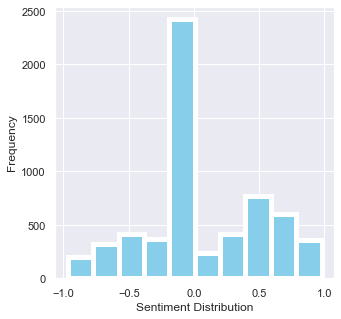

In [15]:
# import necessary modules (if not already imported)
import matplotlib.pyplot as plt
import seaborn as sns

# settings for seaborn plotting style
sns.set(color_codes=True)

# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

# Create Histogram
ax = sns.distplot(tweets_df['C_Score'],
                  bins=10,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 5,'alpha':1})
ax.set(xlabel='Sentiment Distribution', ylabel='Frequency')

In [16]:
# create new column
tweets_df['Sentiment'] = np.nan

# Loop through rows of dataframe and determine strings for new column "Sentiment"
for index, row in tweets_df.iterrows(): 
    if tweets_df.loc[index, 'C_Score'] > 0.05 : 
            tweets_df.loc[index, 'Sentiment'] = "Positive"       
    elif tweets_df.loc[index, 'C_Score'] < -0.05 :
            tweets_df.loc[index, 'Sentiment'] = "Negative"   
    else : 
        tweets_df.loc[index, 'Sentiment'] = "Neutral"

In [17]:
# See whether it worked 
tweets_df[['stripped','C_Score', 'Sentiment']].head(25)


,stripped,C_Score,Sentiment
0,Hungry? Get $5 off your first order on Uber Eats with my code: eats-1hy97.,0.0000,Neutral
1,Try food delivery promo code delivery \n \nuber Restaurant Ubereats\n Promo code postmates grubhub\n\nNew customers only USA only \n \nGet $7.00 off on your order\n\nDoordash code \n when you sign up with this link: (link: ),0.0000,Neutral
2,"McDeliverySweepstakes, McDonalds UberEats Big Mac's Chicken nuggets and Chocolate shake and Apple pie",-0.1779,Negative
3,I just spent $18 on Uber eats for a fucking smoothie.,0.0000,Neutral
4,Hey Uber \n\nBring uber eats to laconia nh,0.4939,Positive
5,"I'd love to enjoy a McFlurry! on my new couch from the McDeliverySweepstakes, and have UberEats deliver my favorite McDonalds treat",0.9245,Positive
6,Waitin on this Uber eats to pull up!!!,0.0000,Neutral
7,"dkhos Hey Dara! Just wanted to inform you of the impending lawsuit against your company for refusing to investigate and refund fraudulent charges not only on Uber but Uber Eats. You let people get away with it because YOU get paid, right? Get ready for a large payout prick.",-0.6239,Negative
8,Uber eats :3,0.5542,Positive
9,UberEats is that annoying friend that sends multiple messages until you finally have to block them.,-0.3400,Negative


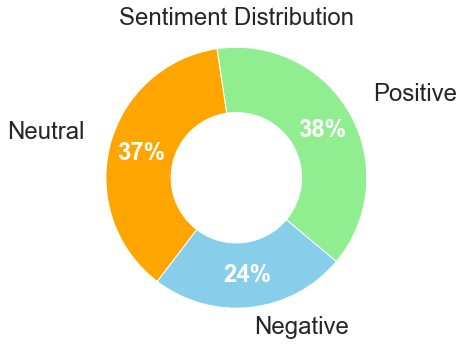

In [18]:
# import necessary modules (if not already imported)
import matplotlib.pyplot as plt

# Set font size
plt.rcParams['font.size']=24

# Define figure
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))

# Get count by sentiment category from tweets_df
sentiment_counts = tweets_df.Sentiment.value_counts()
labels = sentiment_counts.index

# Define colors
color_palette_list = ['lightgreen', 'orange', 'skyblue']

# Generate graph components
wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
       colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

# Plot wedges
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                horizontalalignment=horizontalalignment)
# Set title
ax.set_title("Sentiment Distribution", y=.95, fontsize = 24)

# Show Donut Chart
plt.show()

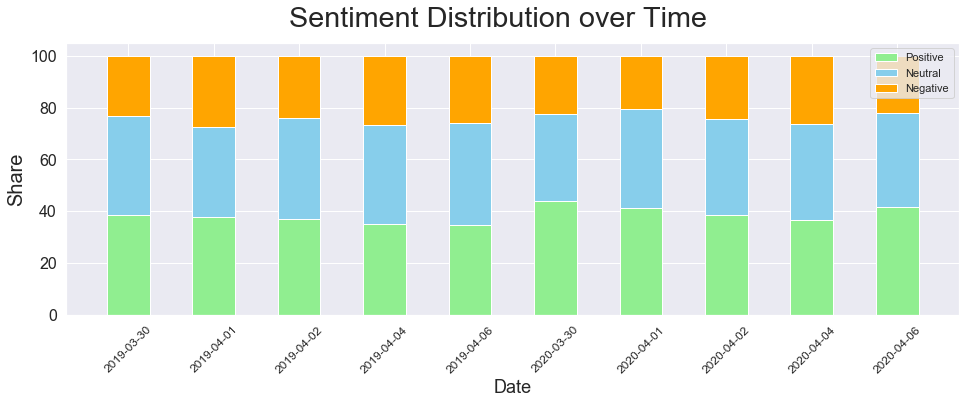

In [19]:
import math
tweets_df['date'] = [one.date() for one in tweets_df['timestamp']]
tweets_df = tweets_df.sort_values(by=['date'])

sentiments = ["Positive", "Neutral", "Negative"]
positiveProps = (tweets_df[tweets_df.Sentiment == 'Positive'].groupby(['date']).count()[['Sentiment']]/ tweets_df.groupby(['date']).count()[['Sentiment']])*100
neutralProps = (tweets_df[tweets_df.Sentiment == 'Neutral'].groupby(['date']).count()[['Sentiment']]/ tweets_df.groupby(['date']).count()[['Sentiment']])*100
negativeProps = (tweets_df[tweets_df.Sentiment == 'Negative'].groupby(['date']).count()[['Sentiment']]/ tweets_df.groupby(['date']).count()[['Sentiment']])*100
 
positiveProps = positiveProps['Sentiment'].tolist()
neutralProps = neutralProps['Sentiment'].tolist()
negativeProps = negativeProps['Sentiment'].tolist()
plt.figure(figsize=[16, 5])
barWidth = 0.5
labels = tweets_df.date.unique()
r = np.arange(len(labels))
positiveProps = [0 if math.isnan(x) else x for x in positiveProps]
neutralProps = [0 if math.isnan(x) else x for x in neutralProps]
negativeProps = [0 if math.isnan(x) else x for x in negativeProps]

plt.bar(r,positiveProps, color='lightgreen', edgecolor='white', width=barWidth)
plt.bar(r, neutralProps, bottom=positiveProps, color='skyblue', edgecolor='white', width=barWidth)
plt.bar(r, negativeProps, bottom=[i+j for i,j in zip(positiveProps, neutralProps)], color='orange', edgecolor='white', width=barWidth)
 
plt.xticks(r, labels, rotation = 45, fontsize=12)
plt.yticks(fontsize=16)
plt.suptitle('Sentiment Distribution over Time')
plt.xlabel("Date", fontsize=18)
plt.ylabel("Share", fontsize=20)
plt.legend(sentiments)
plt.show()

In [20]:
#List of keywords to search for ()
kw_list = ['postmates']
begin = datetime.date(2019, 3, 30)
end = datetime.date(2019, 4, 7)
limit = 3000
lang = 'en'
poolsize = 5

if __name__ == '__main__':
    start_time = time.time()
    tweets = query_tweets(query=" OR ".join(kw_list), 
                          begindate=begin, 
                          enddate = end,
                          limit = limit,
                          lang = lang,
                          poolsize = poolsize,
                         )
print(str(len(tweets)) + " tweets scraped in " + str(round(time.time() - start_time, 2)) + " seconds")

tweets_df = pd.DataFrame(columns = ['timestamp', 'username',  'screen_name', 'user_id','tweet_id', 
                                    'text', 'likes', 'replies', 'retweets','tweet_url', 'parent_tweet_id'])
                         #,'has_media', 'hashtags', 'img_urls', 'is_replied','is_reply_to', 'links','reply_to_users', 'video_url']) 
    

for tweet in tweets:
    tweets_df = tweets_df.append({
        'timestamp': tweet.timestamp,
        'username': tweet.username,
        'screen_name': tweet.screen_name,
        'user_id': tweet.user_id,
        'tweet_id': tweet.tweet_id,
        'text': tweet.text,
        'likes': tweet.likes,
        'replies': tweet.replies,
        'retweets' : tweet.retweets,
        'tweet_url': tweet.tweet_url,
        'parent_tweet_id': tweet.parent_tweet_id}, ignore_index=True)
        #,'has_media': tweet.has_media,'hashtags': tweet.hashtags,'img_urls': tweet.img_urls,'is_replied': tweet.is_replied, 'is_reply_to': tweet.is_reply_to, 'links': tweet.links,'reply_to_users': tweet.reply_to_users, 'video_url': tweet.video_url}, ignore_index=True)

# Delete the tweet object from memory
import gc
del tweets
gc.collect()  

INFO: queries: ['postmates since:2019-03-30 until:2019-03-31', 'postmates since:2019-03-31 until:2019-04-02', 'postmates since:2019-04-02 until:2019-04-03', 'postmates since:2019-04-03 until:2019-04-05', 'postmates since:2019-04-05 until:2019-04-07']
INFO: Got 606 tweets (606 new).
INFO: Got 1224 tweets (618 new).
INFO: Got 1839 tweets (615 new).
INFO: Got 2455 tweets (616 new).
INFO: Got 3061 tweets (606 new).


3061 tweets scraped in 21.86 seconds


4710

In [21]:
from twitterscraper import query_tweets
#List of keywords to search for ()
kw_list = ['postmates']
begin = datetime.date(2020, 3, 30)
end = datetime.date(2020, 4, 7)
limit = 3000
lang = 'en'
poolsize = 5

# Start the Scraper
if __name__ == '__main__':
    start_time = time.time()
    tweets = query_tweets(query=" OR ".join(kw_list), 
                          begindate=begin, 
                          enddate = end,
                          limit = limit,
                          lang = lang,
                          poolsize = poolsize,
                         )
display(str(len(tweets)) + " tweets scraped in " + str(round(time.time() - start_time, 2)) + " seconds")

# Define a dataframe
tweets_df2 = pd.DataFrame(columns = ['timestamp', 'username',  'screen_name', 'user_id','tweet_id', 
                                    'text', 'likes', 'replies', 'retweets','tweet_url', 'parent_tweet_id'])
                         #,'has_media', 'hashtags', 'img_urls', 'is_replied','is_reply_to', 'links','reply_to_users', 'video_url']) 
    
# populate the dataframe    
for tweet in tweets:
    tweets_df2 = tweets_df2.append({
        'timestamp': tweet.timestamp,
        'username': tweet.username,
        'screen_name': tweet.screen_name,
        'user_id': tweet.user_id,
        'tweet_id': tweet.tweet_id,
        'text': tweet.text,
        'likes': tweet.likes,
        'replies': tweet.replies,
        'retweets' : tweet.retweets,
        'tweet_url': tweet.tweet_url,
        'parent_tweet_id': tweet.parent_tweet_id}, ignore_index=True)
        #,'has_media': tweet.has_media,'hashtags': tweet.hashtags,'img_urls': tweet.img_urls,'is_replied': tweet.is_replied, 'is_reply_to': tweet.is_reply_to, 'links': tweet.links,'reply_to_users': tweet.reply_to_users, 'video_url': tweet.video_url}, ignore_index=True)

# Delete the tweet object from memory
import gc
del tweets
gc.collect()  

INFO: queries: ['postmates since:2020-03-30 until:2020-03-31', 'postmates since:2020-03-31 until:2020-04-02', 'postmates since:2020-04-02 until:2020-04-03', 'postmates since:2020-04-03 until:2020-04-05', 'postmates since:2020-04-05 until:2020-04-07']
INFO: Got 619 tweets (619 new).
INFO: Got 1230 tweets (611 new).
INFO: Got 1836 tweets (606 new).
INFO: Got 2455 tweets (619 new).
INFO: Got 3067 tweets (612 new).


'3067 tweets scraped in 22.65 seconds'

0

In [22]:
# Now append the second dataframe to the first one
tweets_df=tweets_df.append(tweets_df2, ignore_index = True)
# Reset index
#tweets_df.reset_index(inplace = True) 
# Check if it worked!
tweets_df.shape

(6128, 11)

In [23]:
tweets_df.to_csv("PostmatesTwitterScraper.csv", index = False)

In [24]:
# Delete the second dataframe from memory
import gc
del tweets_df2
gc.collect()
tweets_df2 = pd.DataFrame() # this creates an empty dataframe to make sure that the original one was deleted

In [25]:
# import regular expressions
import re

# Set-up patterns to be removed fro the tweets
pat1 = r"http\S+"
pat2 = r"#"
pat3 = r"@"
pat4 = r"FAV"
pat5 = r"RE"
pat6 = r"pic.\S+"
combined_pat = r'|'.join((pat1, pat2, pat3, pat4, pat5, pat6))

# replace the patterns with an empty string
tweets_df['stripped'] =  [re.sub(combined_pat, '', w) for w in tweets_df.text]

# might have double spaces now (because of empty string replacements above) - remove double empty spaces
tweets_df['stripped']  = [re.sub(r"  ", ' ', w) for w in tweets_df.loc[:,'stripped']]

# Print tweets
for i in range(0,12):
    print(tweets_df.stripped[i])
    print('\n')

Try food delivery promo code delivery 
 
uber Restaurant Ubereats
 Promo code postmates grubhub

New customers only USA only     
 
Get $7.00 off on your order

Doordash code 
 when you sign up with this link: (link:  )  


When your Postmates order is marked as delivered two different times and yet you still have no food. All you can do is laugh 


Lucky for us we got the waiter app that can deliver food from every restaurant


Postmates_Help do you guys have a promo I can use for my next order? I’m not a first time


Postmates is literally the worst food delivery service ever


My postmates driver told me to enjoy my food........And I said thanks you too. Someone punch me in the face please 


I am terrified to read how we got from A to Z.


Use link for $10 off :  
Use code: Storetodoor or if you wanna pick it up 
$15 worth of food for almost free 
doordash doordashpromo postmates grubhub ubereats free marchmadness   lunch dinner final4 auburn msu virginia TexasTech


Anybody like P

In [26]:
# Import the sentiment module (if you haven't already done so)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Import numpy (if you have not already done so)
import numpy as np

# Instantiate the sentiment analyzer (if you haven't already done so)
analyser = SentimentIntensityAnalyzer()

# Now get the compound sentiment score for each tweet
tweets_df['C_Score'] = np.nan
for index, row in tweets_df.iterrows(): 
    tweets_df.loc[index, 'C_Score'] = analyser.polarity_scores(row['stripped'])['compound']
# Let's take a look!
pd.set_option('display.max_colwidth', -1)
tweets_df[['stripped','C_Score']].head(-50)

C:\Users\Cecilia_Z\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  from ipykernel import kernelapp as app


,stripped,C_Score
0,Try food delivery promo code delivery \n \nuber Restaurant Ubereats\n Promo code postmates grubhub\n\nNew customers only USA only \n \nGet $7.00 off on your order\n\nDoordash code \n when you sign up with this link: (link: ),0.0000
1,When your Postmates order is marked as delivered two different times and yet you still have no food. All you can do is laugh,0.3400
2,Lucky for us we got the waiter app that can deliver food from every restaurant,0.4215
3,Postmates_Help do you guys have a promo I can use for my next order? I’m not a first time,0.0000
4,Postmates is literally the worst food delivery service ever,-0.6249
...,...,...
6073,Sent,0.0000
6074,Note to restaurants: Make SU any promotions you're running to add family meal packs or other boosts are ALSO found in your Uber Eats/DoorDash/Postmates menus. You're missing an opportunity to get more sales by not maintaining those tools.,0.4404
6075,"FORT LAUDERDALE: During these challenging times your Riverside Restaurant Collection favorites add a little happiness to your day Beginning 4/4 Our F&B service hours will be 7AM – 9PM daily. Call us at (954) 467-2555 to order or find us on Postmates, Delivery Dudes, & DoorDash",0.7722
6076,"FORT LAUDERDALE: During these challenging times your Riverside Restaurant Collection favorites add a little happiness to your day Beginning 4/4 Our F&B service hours will be 7AM – 9PM daily. Call us at (954) 467-2555 to order or find us on Postmates, Delivery Dudes, & DoorDash",0.7722


In [27]:
# import necessary modules (if not already imported)
import pandas as pd
import numpy as np

print(f"Count positive tweets: {sum(tweets_df['C_Score'] > 0.05)}")
print(f"Count netural tweets: {tweets_df['C_Score'].between(-0.05, 0.05).sum()}")
print(f"Count negative tweets: {sum(tweets_df['C_Score'] < -0.05)}")
print(f"Total number of tweets: {tweets_df['C_Score'].count()}")
      
display(tweets_df.C_Score.describe())

Count positive tweets: 2625
Count netural tweets: 2033
Count negative tweets: 1470
Total number of tweets: 6128


count    6128.000000
mean     0.114751   
std      0.441680   
min     -0.956900   
25%      0.000000   
50%      0.000000   
75%      0.466750   
max      0.977600   
Name: C_Score, dtype: float64

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Sentiment Distribution')]

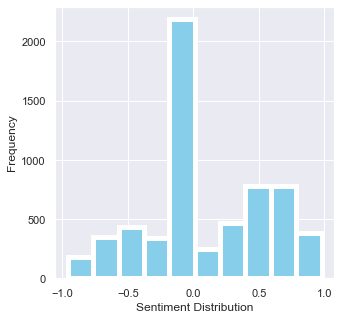

In [28]:
# import necessary modules (if not already imported)
import matplotlib.pyplot as plt
import seaborn as sns

# settings for seaborn plotting style
sns.set(color_codes=True)

# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

# Create Histogram
ax = sns.distplot(tweets_df['C_Score'],
                  bins=10,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 5,'alpha':1})
ax.set(xlabel='Sentiment Distribution', ylabel='Frequency')

In [29]:
# create new column
tweets_df['Sentiment'] = np.nan

# Loop through rows of dataframe and determine strings for new column "Sentiment"
for index, row in tweets_df.iterrows(): 
    if tweets_df.loc[index, 'C_Score'] > 0.05 : 
            tweets_df.loc[index, 'Sentiment'] = "Positive"       
    elif tweets_df.loc[index, 'C_Score'] < -0.05 :
            tweets_df.loc[index, 'Sentiment'] = "Negative"   
    else : 
        tweets_df.loc[index, 'Sentiment'] = "Neutral"

In [30]:
# See whether it worked 
tweets_df[['stripped','C_Score', 'Sentiment']].head(25)


,stripped,C_Score,Sentiment
0,Try food delivery promo code delivery \n \nuber Restaurant Ubereats\n Promo code postmates grubhub\n\nNew customers only USA only \n \nGet $7.00 off on your order\n\nDoordash code \n when you sign up with this link: (link: ),0.0000,Neutral
1,When your Postmates order is marked as delivered two different times and yet you still have no food. All you can do is laugh,0.3400,Positive
2,Lucky for us we got the waiter app that can deliver food from every restaurant,0.4215,Positive
3,Postmates_Help do you guys have a promo I can use for my next order? I’m not a first time,0.0000,Neutral
4,Postmates is literally the worst food delivery service ever,-0.6249,Negative
5,My postmates driver told me to enjoy my food........And I said thanks you too. Someone punch me in the face please,0.8126,Positive
6,I am terrified to read how we got from A to Z.,-0.6124,Negative
7,Use link for $10 off : \nUse code: Storetodoor or if you wanna pick it up \n$15 worth of food for almost free \ndoordash doordashpromo postmates grubhub ubereats free marchmadness lunch dinner final4 auburn msu virginia TexasTech,0.8024,Positive
8,Anybody like Postmates ?,0.3612,Positive
9,fuck you for not up my food and delivering it Postmates,-0.5423,Negative


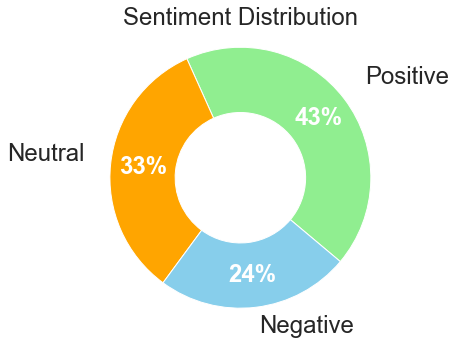

In [31]:
# import necessary modules (if not already imported)
import matplotlib.pyplot as plt

# Set font size
plt.rcParams['font.size']=24

# Define figure
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))

# Get count by sentiment category from tweets_df
sentiment_counts = tweets_df.Sentiment.value_counts()
labels = sentiment_counts.index

# Define colors
color_palette_list = ['lightgreen', 'orange', 'skyblue']

# Generate graph components
wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
       colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

# Plot wedges
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                horizontalalignment=horizontalalignment)
# Set title
ax.set_title("Sentiment Distribution", y=.95, fontsize = 24)

# Show Donut Chart
plt.show()

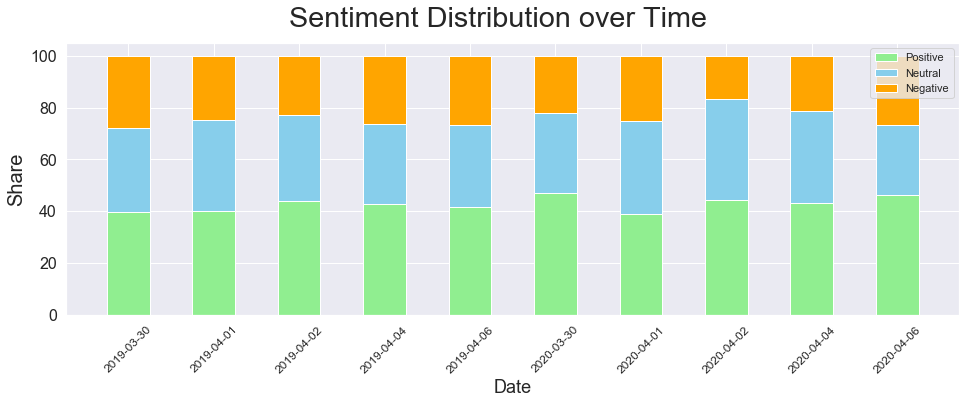

In [32]:
import math
tweets_df['date'] = [one.date() for one in tweets_df['timestamp']]
tweets_df = tweets_df.sort_values(by=['date'])

sentiments = ["Positive", "Neutral", "Negative"]
positiveProps = (tweets_df[tweets_df.Sentiment == 'Positive'].groupby(['date']).count()[['Sentiment']]/ tweets_df.groupby(['date']).count()[['Sentiment']])*100
neutralProps = (tweets_df[tweets_df.Sentiment == 'Neutral'].groupby(['date']).count()[['Sentiment']]/ tweets_df.groupby(['date']).count()[['Sentiment']])*100
negativeProps = (tweets_df[tweets_df.Sentiment == 'Negative'].groupby(['date']).count()[['Sentiment']]/ tweets_df.groupby(['date']).count()[['Sentiment']])*100
 
positiveProps = positiveProps['Sentiment'].tolist()
neutralProps = neutralProps['Sentiment'].tolist()
negativeProps = negativeProps['Sentiment'].tolist()
plt.figure(figsize=[16, 5])
barWidth = 0.5
labels = tweets_df.date.unique()
r = np.arange(len(labels))
positiveProps = [0 if math.isnan(x) else x for x in positiveProps]
neutralProps = [0 if math.isnan(x) else x for x in neutralProps]
negativeProps = [0 if math.isnan(x) else x for x in negativeProps]

plt.bar(r,positiveProps, color='lightgreen', edgecolor='white', width=barWidth)
plt.bar(r, neutralProps, bottom=positiveProps, color='skyblue', edgecolor='white', width=barWidth)
plt.bar(r, negativeProps, bottom=[i+j for i,j in zip(positiveProps, neutralProps)], color='orange', edgecolor='white', width=barWidth)
 
plt.xticks(r, labels, rotation = 45, fontsize=12)
plt.yticks(fontsize=16)
plt.suptitle('Sentiment Distribution over Time')
plt.xlabel("Date", fontsize=18)
plt.ylabel("Share", fontsize=20)
plt.legend(sentiments)
plt.show()